# Predicting a quantity of interest from spectral data

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import requests

In [3]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification if needed
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# 2)-Loading data

In [5]:
data = pd.read_csv('cal 2018.csv',sep=';', header=None)
data.shape

(3908, 682)

In [6]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574


The data for this assignment consists of the following columns (in this particular order):

- Sample number.
- The quantity to predict.
- The rest of the columns are the spectral data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Columns: 682 entries, 0 to 681
dtypes: float64(681), int64(1)
memory usage: 20.3 MB


For accessing ID, we can use iloc

In [8]:
data.iloc[:,0]

0          1
1          2
2          3
3          4
4          5
        ... 
3903    3904
3904    3905
3905    3906
3906    3907
3907    3908
Name: 0, Length: 3908, dtype: int64

This variable will not be useful for our analysis. Hence, I ll remove it from data for now

**As per directions, this problem is regression analysis as our dependant variable is numeric variable. So, I ll keep my analysis accordingly.**

In [9]:
df=data.iloc[:,1:682]

In [10]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
0,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574


In [11]:
df.shape

(3908, 681)

In [12]:
df.iloc[:,1]

0       0.597482
1       0.954192
2       0.611137
3       0.342604
4       0.760703
          ...   
3903    0.599928
3904    0.382061
3905    0.701410
3906    0.544052
3907    0.401206
Name: 2, Length: 3908, dtype: float64

In [13]:
y=df.iloc[:,1]

In [14]:
y

0       0.597482
1       0.954192
2       0.611137
3       0.342604
4       0.760703
          ...   
3903    0.599928
3904    0.382061
3905    0.701410
3906    0.544052
3907    0.401206
Name: 2, Length: 3908, dtype: float64

In [15]:
df.shape

(3908, 681)

In [16]:
X=df.iloc[:,1:682]

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X.head(2)

,2,3,4,5,6,7,8,9,10,11,...,672,673,674,675,676,677,678,679,680,681
0,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,0.560204,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,0.934336,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574


In [19]:
print(X.shape)
print(y.shape)

(3908, 680)
(3908,)


In [20]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
0,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574


For our analysis, It is useful to separate data into dependant and independant variables which I did very early

# 3)- Data Exploring

### 3.1)- Check data type

In [21]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
1,float64
449,float64
450,float64
451,float64
452,float64
...,...
230,float64
231,float64
232,float64
224,float64


We have too many columns to observe. It is unwise to look and assume that all variables are int or float. Some exploration is needed

In [22]:
df.describe(include=['float', 'bool'])

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,...,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,31.247135,0.673552,0.673042,0.672289,0.671280,0.669945,0.668317,0.666428,0.664173,0.661742,...,0.180276,0.179063,0.177920,0.176871,0.175921,0.175057,0.174249,0.173527,0.172905,0.172366
std,20.044317,0.177404,0.176938,0.176444,0.175918,0.175353,0.174777,0.174194,0.173637,0.173111,...,0.099334,0.098570,0.097812,0.097090,0.096401,0.095744,0.095132,0.094552,0.094031,0.093534
min,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,0.232572,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,13.096103,0.561772,0.560873,0.560031,0.558322,0.556361,0.553321,0.550164,0.545606,0.540858,...,0.099678,0.099215,0.098735,0.098217,0.097774,0.097524,0.097338,0.097088,0.097002,0.096858
50%,22.770000,0.715334,0.714612,0.714208,0.713636,0.712055,0.710524,0.708472,0.705815,0.702930,...,0.155023,0.154046,0.153240,0.152510,0.151948,0.151446,0.151025,0.150611,0.150263,0.149869
75%,51.250000,0.813234,0.812471,0.812104,0.811087,0.809613,0.807882,0.806053,0.804372,0.802689,...,0.271536,0.269194,0.267222,0.265850,0.264328,0.262811,0.261621,0.260589,0.259669,0.258567
max,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,1.144481,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


In [23]:
#df.describe(include=['object', 'bool'])

With above command, I got an error"No objects to concatenate"

It shows that there are no categorical values in dataset

**Problem is that this dataset has too much to see and one by one exploration is not possible**

### 3.2 Check Data Description

In [24]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,...,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,31.247135,0.673552,0.673042,0.672289,0.671280,0.669945,0.668317,0.666428,0.664173,0.661742,...,0.180276,0.179063,0.177920,0.176871,0.175921,0.175057,0.174249,0.173527,0.172905,0.172366
std,20.044317,0.177404,0.176938,0.176444,0.175918,0.175353,0.174777,0.174194,0.173637,0.173111,...,0.099334,0.098570,0.097812,0.097090,0.096401,0.095744,0.095132,0.094552,0.094031,0.093534
min,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,0.232572,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,13.096103,0.561772,0.560873,0.560031,0.558322,0.556361,0.553321,0.550164,0.545606,0.540858,...,0.099678,0.099215,0.098735,0.098217,0.097774,0.097524,0.097338,0.097088,0.097002,0.096858
50%,22.770000,0.715334,0.714612,0.714208,0.713636,0.712055,0.710524,0.708472,0.705815,0.702930,...,0.155023,0.154046,0.153240,0.152510,0.151948,0.151446,0.151025,0.150611,0.150263,0.149869
75%,51.250000,0.813234,0.812471,0.812104,0.811087,0.809613,0.807882,0.806053,0.804372,0.802689,...,0.271536,0.269194,0.267222,0.265850,0.264328,0.262811,0.261621,0.260589,0.259669,0.258567
max,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,1.144481,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


We can find very quickly what are minimum values and what are maximum values. This gives us idea about peak and dip point irrespective of units. For example variable 5 describing spectral data shows a mean of 0.67 and standard deviation of 0.175 . It is pretty much consistent with its highest values i.e 1.16 and lowest value 0.228. This shows how data would behave. There is low chance of having any exceptional values aka outliers in such data. I ll still take care of this using normalization in later stages

- For our target variable i.e 1. We see different pattern. Mean is 31.24 and std deviation is 20.04. Similary min is 3.06 while max value is 76. This is very much a case of having few peaks and lows that are bit suspicious

### 3.3)- Missing values

In [25]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  3908
No. of missing fields:  0


,No. of mising Value,%age of missing Value


We have no missing data so, we need NOT to worry about solving this issue

### 3.4)- Duplicate values

In [26]:
df.duplicated().sum()

207

None found, so no action needed.

### 3.5)-Outliers

In [27]:
df['y']=y

In [28]:
y[:5]

0    0.597482
1    0.954192
2    0.611137
3    0.342604
4    0.760703
Name: 2, dtype: float64

In [29]:
df.y[:5]

0    0.597482
1    0.954192
2    0.611137
3    0.342604
4    0.760703
Name: y, dtype: float64

In [30]:
df.shape

(3908, 682)

In [31]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew


In [32]:
# Check with dependant variable
x = _zoom_3sigma('y', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 0.14
High value: 1.21


There is huge variation in low and high value. So, we have tendency of outliers in our data. I ll get to solution of this issue. 

In [33]:
# droping additional "y" from df
df=df.drop('y',axis=1)
df.shape

(3908, 681)

### 3.6)- Finding Correlation between variables

In [34]:
df.corr()

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
1,1.000000,0.124528,0.123571,0.122598,0.121497,0.120280,0.119158,0.117839,0.116810,0.115843,...,-0.178599,-0.178057,-0.177152,-0.175994,-0.174197,-0.172226,-0.170061,-0.167825,-0.165495,-0.163339
2,0.124528,1.000000,0.999991,0.999956,0.999878,0.999734,0.999488,0.999115,0.998548,0.997785,...,0.650259,0.649243,0.648371,0.647584,0.646914,0.646352,0.645872,0.645535,0.645277,0.645084
3,0.123571,0.999991,1.000000,0.999986,0.999935,0.999821,0.999612,0.999279,0.998760,0.998047,...,0.652470,0.651455,0.650582,0.649794,0.649124,0.648560,0.648079,0.647741,0.647482,0.647288
4,0.122598,0.999956,0.999986,1.000000,0.999980,0.999906,0.999742,0.999461,0.999003,0.998354,...,0.655272,0.654257,0.653385,0.652596,0.651925,0.651359,0.650878,0.650538,0.650279,0.650084
5,0.121497,0.999878,0.999935,0.999980,1.000000,0.999972,0.999864,0.999646,0.999261,0.998690,...,0.658787,0.657773,0.656901,0.656112,0.655441,0.654875,0.654393,0.654052,0.653792,0.653597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-0.172226,0.646352,0.648560,0.651359,0.654875,0.659104,0.664125,0.669921,0.676464,0.683520,...,0.999809,0.999875,0.999927,0.999966,0.999991,1.000000,0.999992,0.999969,0.999935,0.999893
678,-0.170061,0.645872,0.648079,0.650878,0.654393,0.658622,0.663644,0.669441,0.675986,0.683046,...,0.999724,0.999804,0.999871,0.999925,0.999967,0.999992,1.000000,0.999993,0.999973,0.999943
679,-0.167825,0.645535,0.647741,0.650538,0.654052,0.658280,0.663301,0.669099,0.675645,0.682707,...,0.999632,0.999724,0.999804,0.999871,0.999928,0.999969,0.999993,1.000000,0.999993,0.999976
680,-0.165495,0.645277,0.647482,0.650279,0.653792,0.658020,0.663043,0.668842,0.675391,0.682456,...,0.999536,0.999638,0.999730,0.999809,0.999880,0.999935,0.999973,0.999993,1.000000,0.999994


- Each variable has value 1 in diagnol showing its own relation with itself
- We shall check few instances of Target variable(1) vs independant variables(from 2 to all others). We see some positive values and few negative effects. But, there seems to be of moderate effect. There is no value that is very high dependant.
- We may also explore how different independant variables are correlated to each. For example , 3 and 4 and we can see a high value. In fact 3 has a high value for other instances such as 673,674. This is interesting !

### 3.7)- Checking Variance Inflation Factor(VIF)

multi-colinearlity 

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [37]:
vif.round(1)

,VIF Factor,features
0,3.064998e+09,2
1,1.292763e+10,3
2,1.251855e+10,4
3,1.291053e+10,5
4,1.159883e+10,6
...,...,...
675,2.340860e+08,677
676,2.435193e+08,678
677,2.448151e+08,679
678,2.184990e+08,680


Higher VIF values show more colinearity as vice-versa. For my view, all have very high value. Mostly we take 10 or higher as multi-colinear.

### 3.8)- Histogram

In [38]:
df_vis=data.iloc[:,1:15]

In [39]:
df_vis.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,0.560204,0.551694,0.544339,0.537008
1,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,0.934336,0.931181,0.928030,0.924979


I have taken 15 variables for visual representation.

One might argue why 1st 15 , why not last or middle which is valid. Idea is not to argue about size, number as these all independant variables are same. If they were of different types then this approach won't be appliable.

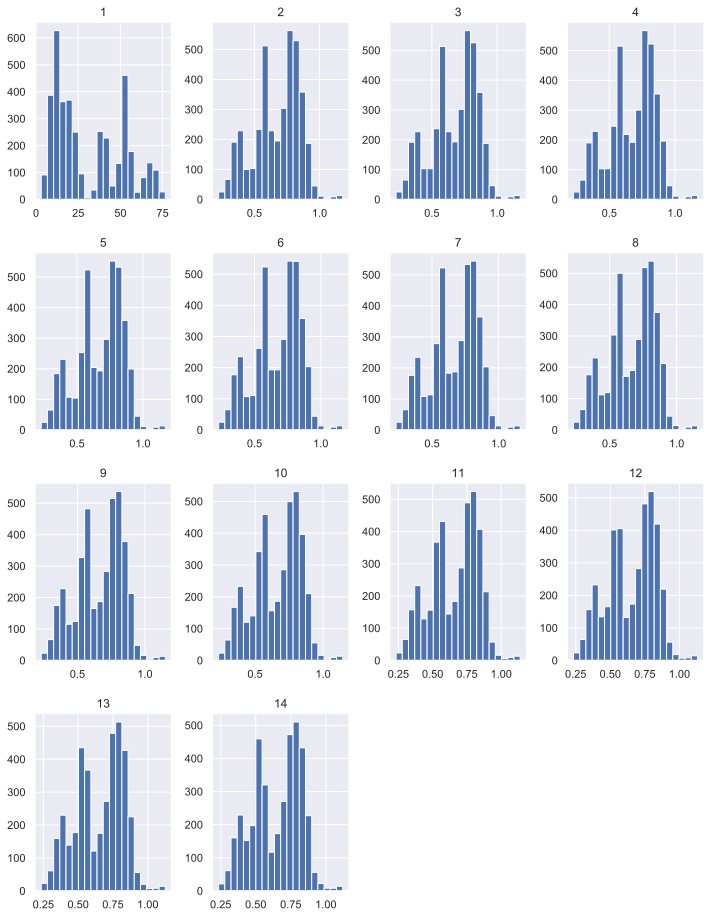

In [40]:
df_vis.hist(bins = 20 , figsize= (12,16)) ;

only Target variable is different. Rest of 15 features have pretty much same pattern of skewedness and spread

# 4)- Pre-Modeling process

### 4.1)-Normalize data

By this step, we can also minimize our **outlier** problem
- Outlier can be brought down by using log. We have too many variables so, I chose scaling

In [42]:
X.shape

(3908, 680)

In [43]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [44]:
X_scaled.shape

(3908, 680)

In [45]:
X_scaled

array([[-0.42885298, -0.43559916, -0.44590094, ..., -0.61519405,
        -0.61720907, -0.61822554],
       [ 1.58213255,  1.58377621,  1.58547867, ...,  1.06417126,
         1.06215912,  1.06079685],
       [-0.35186753, -0.35879355, -0.36763505, ..., -0.64856318,
        -0.65030893, -0.65154087],
       ...,
       [ 0.15705155,  0.16075302,  0.16552916, ...,  1.16926925,
         1.16688189,  1.16464085],
       [-0.73006717, -0.73932849, -0.74997002, ..., -1.28028863,
        -1.28262462, -1.28538438],
       [-1.53537338, -1.53481694, -1.53365857, ..., -1.13534881,
        -1.13561741, -1.13600194]])

In [46]:
df_transformed = pd.DataFrame(X_scaled)

In [47]:
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,670,671,672,673,674,675,676,677,678,679
0,-0.428853,-0.435599,-0.445901,-0.457317,-0.470504,-0.487687,-0.503879,-0.530135,-0.552411,-0.573185,...,-0.611431,-0.611546,-0.610938,-0.611356,-0.612119,-0.612492,-0.613839,-0.615194,-0.617209,-0.618226
1,1.582133,1.583776,1.585479,1.587002,1.588066,1.589779,1.591044,1.592017,1.593238,1.594275,...,1.080184,1.076461,1.073233,1.069903,1.068676,1.067900,1.066933,1.064171,1.062159,1.060797
2,-0.351868,-0.358794,-0.367635,-0.378139,-0.390755,-0.406292,-0.423891,-0.444553,-0.467968,-0.492165,...,-0.645397,-0.644802,-0.644477,-0.643987,-0.645314,-0.645911,-0.647046,-0.648563,-0.650309,-0.651541
3,-1.865749,-1.861651,-1.856873,-1.851191,-1.844353,-1.836378,-1.827164,-1.816110,-1.804106,-1.790877,...,-0.963623,-0.961262,-0.958734,-0.956372,-0.954275,-0.952655,-0.951209,-0.950151,-0.949426,-0.948870
4,0.491322,0.496443,0.502856,0.510403,0.519383,0.529391,0.540773,0.554283,0.568072,0.581928,...,1.305066,1.305169,1.305724,1.304980,1.304068,1.302220,1.300139,1.298959,1.296091,1.293690


Normalized features are on same scale in comparison to other features

### 4.2)-PCA

We can use create a function for PCA where we do scaling and PCA transformation at same time

In [48]:
scaler = StandardScaler()
def transform_data(scaler, df, columns):
    transformed_data = scaler.transform(X[columns])
    df_transformed = pd.DataFrame(transformed_data, columns=columns)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]

In [49]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
transform_data(scaler, X, X.columns)

In [51]:
df_pca = X.copy()

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) 

In [53]:
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
# No. of PCA Components
print ('Variance: ', pca.n_components)
print ('No. of components to keep: ', pca.n_components_)

Variance:  0.9
No. of components to keep:  1


In [55]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(X[columns])
    
    tcols = []
    for i in range(pca.n_components_):       
        tcols.append('component_' + str(i))
    
    print ('components:',tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

In [56]:
transform_with_pca(pca,df_pca,df_pca.columns)

components: ['component_0']


['component_0']

In [57]:
df_pca.head()

,component_0
0,-27.655809
1,31.683732
2,-27.630021
3,-21.690139
4,30.330989


# 5)-Regression Model

In [58]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_transformed, y, test_size=0.20, random_state=0)

### a)- With all normal variables

In [59]:
# Train with actual data using Linear Regression Model
import sklearn.linear_model as lm

regressor = lm.LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_predicted = regressor.predict(test_X)

In [88]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(test_y,y_predicted)**.5))

RMSE:1.51314701014756

### b)-With PCA component

In [63]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_pca, y, test_size=0.20, random_state=0)

In [64]:
regressor = lm.LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_predicted_pca = regressor.predict(test_X)

In [66]:
print("RMSE: {0}".format(metrics.mean_squared_error(test_y,y_predicted_pca)**.5))

RMSE: 0.6915022951395253


Clearly, we have found a lower loss which shows that PCA will be a better option than having all features in place.

- We can discard the other components. We retain 90% of the information, with 10% of the complexity. Our variables are highly correlated, and with our visual analysis they seem to be skewed.

Note:
    
- There are couple of problems with PCA. One is that it does not work with categorical variables. We do not have in our data but, in case.
- For us, the problem is that if we replace all those variables with one component then we only know about relation of one component vs our target varioable. We want to see how independent variables are significant / important for us. Which one are most relevant and which one are least relevant.
- In traditional econometrics, we use t-test or p-values. I do not want to go there. I ll use advanced ML to solve this problem as there around 680 variables. If it was a case of 20 variables then I might try that traditional approach.

**I will use Machine learning models. This is where traditional econometrics leaves and Machine Learning checks in. We shall see POWER of Machine Learning and how our models' result increase significantly**

# 5)- ML 

In [67]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_transformed, y, test_size=0.20, random_state=0)

In [68]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(3126, 680)
(782, 680)
(3126,)
(782,)


In [69]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [70]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [71]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[15:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [72]:
# Convert list to dataframe
result = pd.DataFrame(model_data)
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.020974,0.000000,-0.000770,1.015110
1,Ridge:,0.031729,0.999991,0.999991,0.003101
2,KNeighborsRegressor:,0.044369,0.996843,0.993803,0.079877
3,SVR:,0.257651,0.997755,0.997384,0.051897
4,RandomForest,5.803122,0.999987,0.999898,0.010267
5,ExtraTreeRegressor :,2.234950,1.000000,0.999967,0.005865
6,GradientBoostingClassifier:,9.935775,0.999938,0.999879,0.011150
7,XGBRegressor:,13.470989,0.999939,0.999908,0.009742
8,MLPRegressor:,0.725763,0.998145,0.998169,0.043422


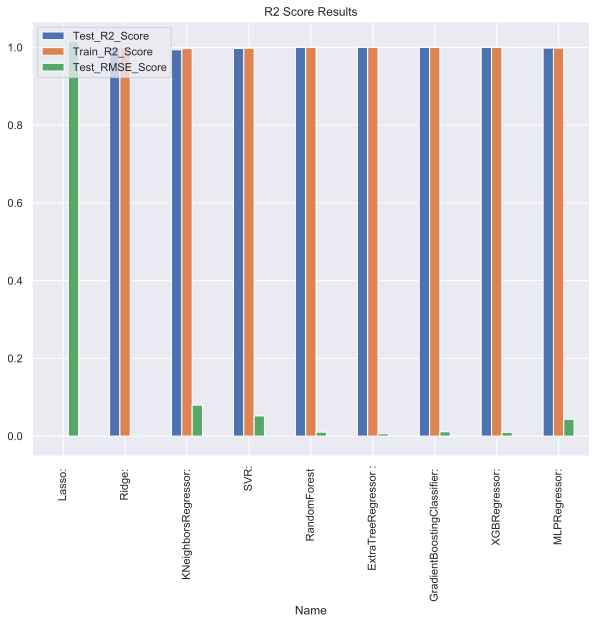

In [73]:
result.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

ExtraTree Regressor has given best RMSE value i.e 0.005865

Lower RMSE , better our model is hence, ExtraTree Regressor is our optimal model

# 6)-Parameter Tuning

To imporve further on given results using our optimal model

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                           max_depth=None, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators='warn', n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2']

In [75]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 150}

In [76]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=80,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
                    oob_score=False, random_state=40, verbose=0,
                    warm_start=False)

In [77]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

0.9999999918441663

In [78]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.9999754214481569

In [79]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.005030650421222792

**This is good score for R-sq and loss function. I ll try some of most important featires and see if I may get any better values**

### 6.2)-Feature Importance

In [80]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [81]:
train_X.columns

RangeIndex(start=0, stop=680, step=1)

In [82]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]

In [83]:
# Get top 10 most important feature 
names[0:10]

[0, 1, 4, 2, 6, 8, 5, 7, 3, 9]

In [84]:
# Get 10 least important feature 
names[-10:]

[609, 499, 352, 318, 445, 337, 315, 513, 370, 562]

### 6.3)- Train model with Feature importance

In [85]:
# Reduce test & training set to 10 feature set
train_important_feature = train_X[names[0:10]]
test_important_feature = test_X[names[0:10]]

In [86]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=80,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
                    oob_score=False, random_state=40, verbose=0,
                    warm_start=False)

In [87]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999999925464578
Testing set R2 Score -  0.9999945413214706
Testing set RMSE Score -  0.0023707718030239935


With feature importance , we have even decreased our loss i.e error function

- In the end , I have shown how model would look if we have 10 most important features
- Earlier I also applied PCA to show that 90% variance of features can be achieved by one.



# Submission

We have our results and they seem good espcially from where did we start. R-sq gives us idea about overall model performance whereas RMSE shows our loss function-lower is better.

If I had more information about variable types, their influence and effect in terms of domain then I might have done more Explorartory analysis or even create new features out of given data. I am still satisfied with outcome.

I hope you would enjoy reading my code as well

Thanks alot !

**END OF NOTEBOOK**